# EXPLORATORY DATA ANALYSIS

In [1]:
#Import necessary libraries
import pandas as pd #for data manipulation
import numpy as np #for numerical operations
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for plotting

sns.set(style="whitegrid") #tO set the style of seaborn plots
plt.rcParams["figure.figsize"] = (10, 6) #for setting default figure size

#loading dataset
df = pd.read_csv('../data/transformed/Final/cleaned_finance_dataset.csv')  # adjust path if needed
df.head()


,Date,Company,Stock_Price,Revenue_Millions,Net_Income_Millions,Market_Cap_Billions,EPS,Profit_Margin,Revenue_Growth
0,2022-01-01,EnergyCo,65.3,700.60,90.15,32.65,1.50,12.867542,0.000000
1,2022-02-01,EnergyCo,66.1,710.25,92.30,33.05,1.52,12.995424,1.377391
2,2022-03-01,EnergyCo,65.8,705.50,91.10,32.90,1.51,12.912828,-0.668779
3,2022-04-01,EnergyCo,66.5,715.75,93.25,33.25,1.53,13.028292,1.452870
4,2022-05-01,EnergyCo,67.0,720.90,94.50,33.50,1.55,13.108614,0.719525


### Interpretation 
1. Stock_Price
Gradually increased from $65.3 to $67.0 over 5 months — a modest growth in investor confidence.
Slight dip in March ($65.8) might reflect a temporary concern or correction.
2. Revenue_Millions
Started at $700.60M, ended at $720.90M.
Month-by-month change:
Feb: small growth
Mar: slight drop
Apr & May: back to growth
Overall: revenue is growing slowly, suggesting demand is steady but not surging.
3. Net_Income_Millions
Growing month by month (from $90.15M → $94.50M).
Even in March, when revenue dipped slightly, net income stayed strong.
Suggests improved operational efficiency or cost control.
4. Market_Cap_Billions
Grew from $32.65B to $33.50B.Matches stock price trend, since:
Market Cap=Stock Price×Shares Outstanding
Steady growth shows positive investor sentiment
5. EPS (Earnings Per Share)
Rose from 1.50 to 1.55 — indicates increasing profitability per share.
Positive sign for shareholders.
6. Profit_Margin (%)
Fairly steady around 13%, slight increase from 12.87% to 13.11%.
Profit margin = Net Income ÷ Revenue → shows how much profit the company keeps from each dollar earned.
7. Revenue_Growth (%)
Feb: +1.38% (growth)
Mar: -0.67% (drop)
Apr: +1.45% (strong recovery)
May: +0.72%
Slight volatility but overall positive trend.

## 2. Dataset summary

In [2]:

df.info() # To get a concise summary of the DataFrame, including the number of non-null entries and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 199 non-null    object 
 1   Company              199 non-null    object 
 2   Stock_Price          199 non-null    float64
 3   Revenue_Millions     199 non-null    float64
 4   Net_Income_Millions  199 non-null    float64
 5   Market_Cap_Billions  199 non-null    float64
 6   EPS                  199 non-null    float64
 7   Profit_Margin        199 non-null    float64
 8   Revenue_Growth       199 non-null    float64
dtypes: float64(7), object(2)
memory usage: 14.1+ KB


- The dataset consists of 199 entries and 9 columns, capturing monthly financial performance metrics for a company over time.

- Each record includes the date, company name, and various key indicators such as stock price, revenue and net income in millions, market capitalization in billions, earnings per share (EPS), profit margin, and revenue growth percentage. 

- All the data is complete, with no missing values. Most columns are numerical (float64), while the Date and Company columns are stored as object types—though the Date column would be more useful if converted to datetime format. 

- Overall,the dataset appears clean,well-structured, and ready for time-series or financial analysis.

In [3]:
df.describe() #To get a statistical summary of the DataFrame, including count, mean, std, min, 25%, 50%, 75%, and max for each numerical column

,Stock_Price,Revenue_Millions,Net_Income_Millions,Market_Cap_Billions,EPS,Profit_Margin,Revenue_Growth
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,101.264824,1263.223367,139.545729,50.632211,1.928894,12.265536,0.466319
std,44.640452,482.494503,39.824162,22.321898,0.483611,3.814984,0.675175
min,42.500000,700.600000,85.300000,21.250000,1.100000,4.373798,-1.264532
25%,69.100000,893.125000,107.500000,34.550000,1.605000,13.156689,-0.115325
50%,91.100000,1082.750000,128.500000,45.550000,1.880000,14.135309,0.546590
75%,127.000000,1505.500000,166.500000,63.500000,2.285000,14.452049,0.955942
max,202.500000,2265.500000,234.250000,101.250000,2.930000,15.169877,2.103290


- Profit_Margin is positively skewed: most companies have high margins, but a few are very low (min = 4.37%).

- 75% of companies are already near the maximum margin (15.17%) → shows strong profitability overall.

- Revenue_Growth has a wide range (from -1.26 to +2.10), showing both declining and fast-growing companies.

- This may indicate a mix of mature and emerging companies in the dataset.

In [4]:
df.isnull().sum() #To check for missing values in each column

Date                   0
Company                0
Stock_Price            0
Revenue_Millions       0
Net_Income_Millions    0
Market_Cap_Billions    0
EPS                    0
Profit_Margin          0
Revenue_Growth         0
dtype: int64

- No missing values in any of the 9 columns — the dataset is complete.

- Date and Company are categorical/object types, while all others are numeric.

- This makes the dataset ready for immediate analysis or modeling without needing imputation.

## 3. Univariate Analysis:Distributions

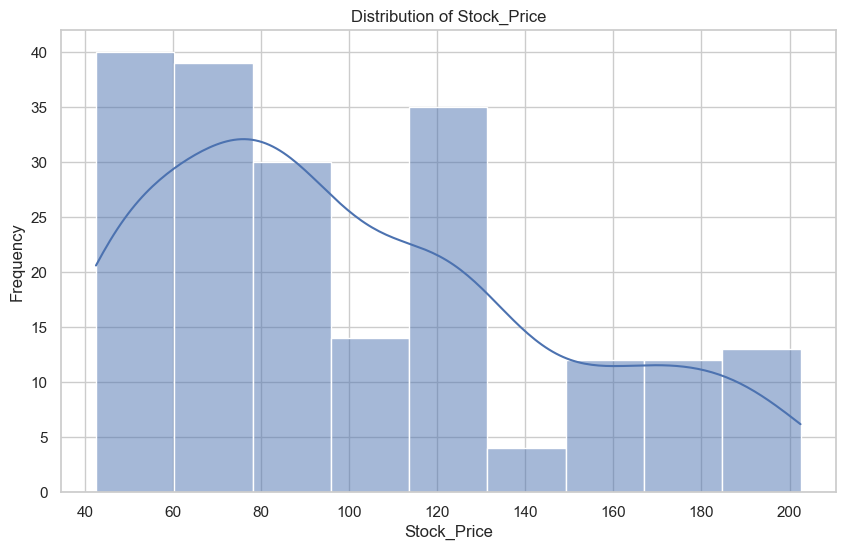

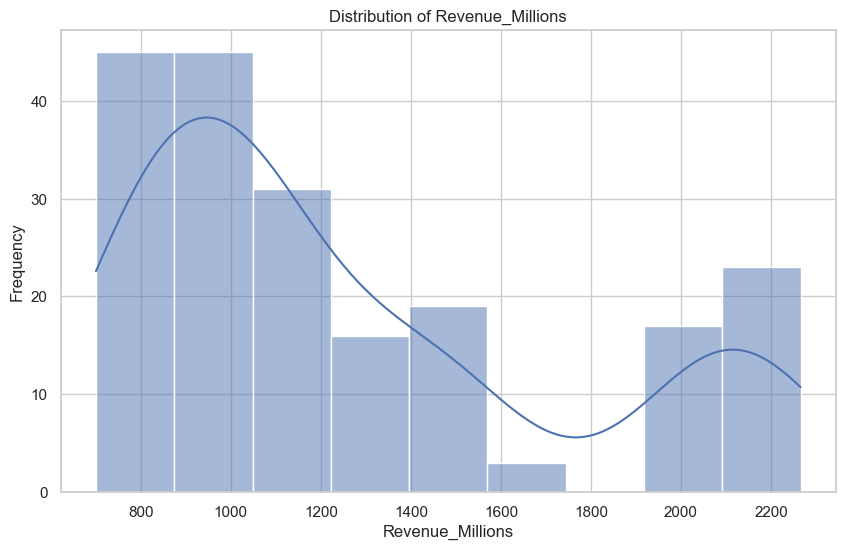

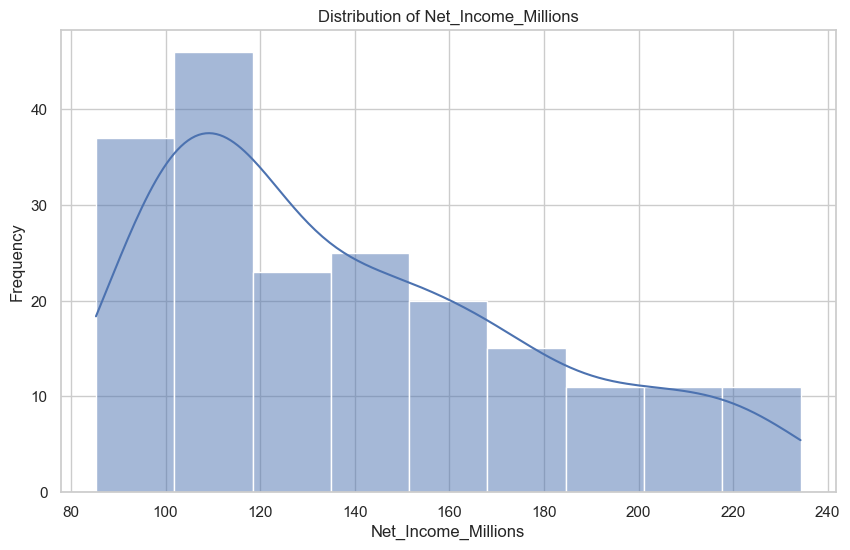

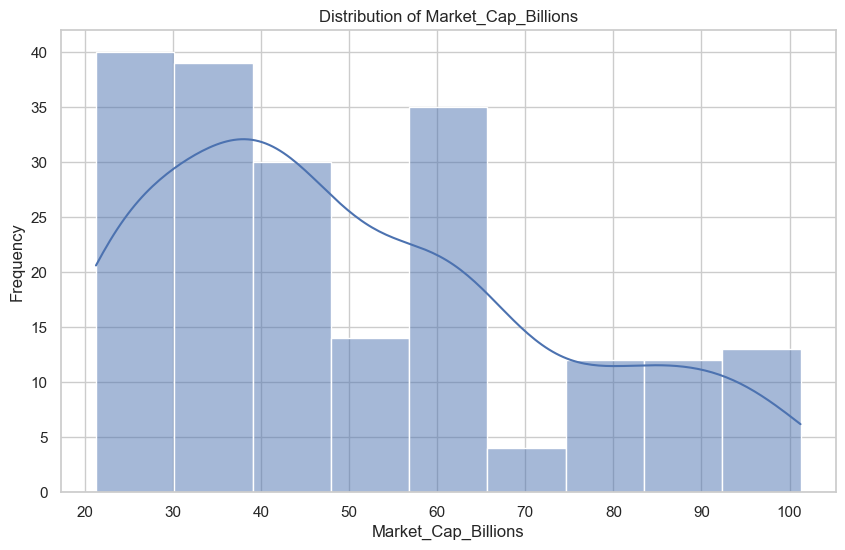

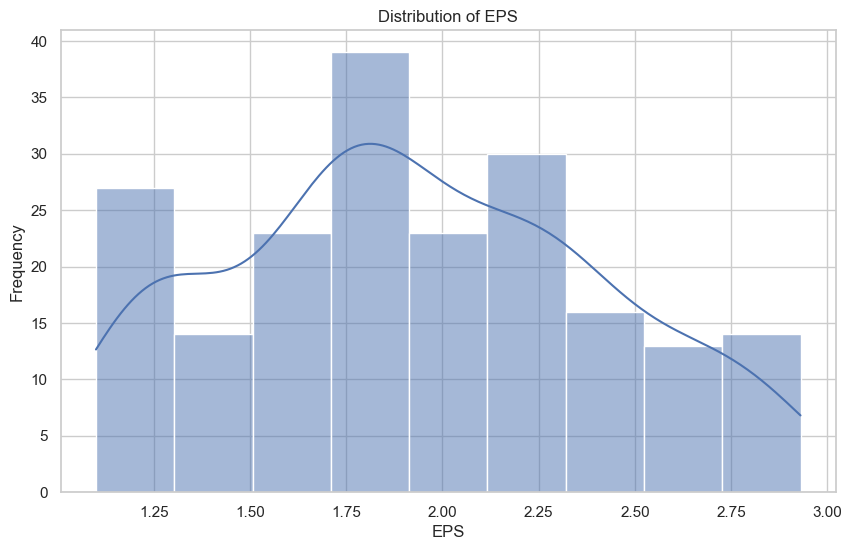

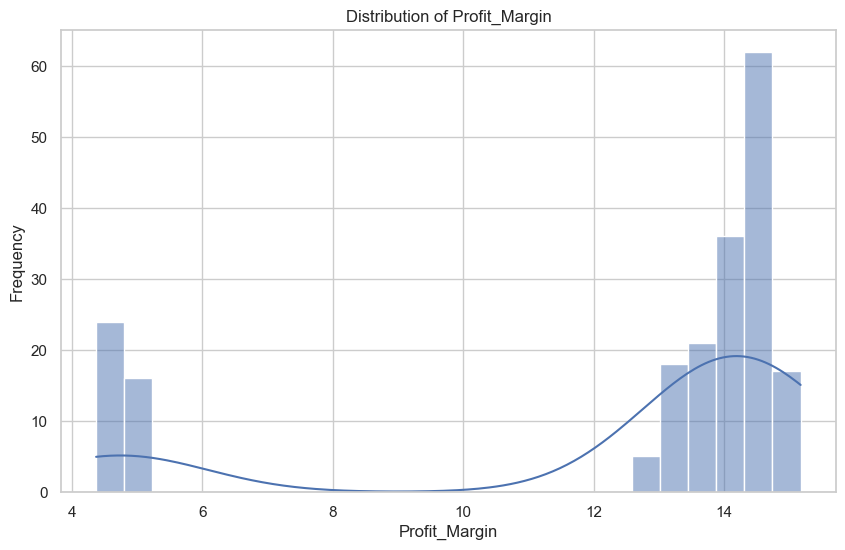

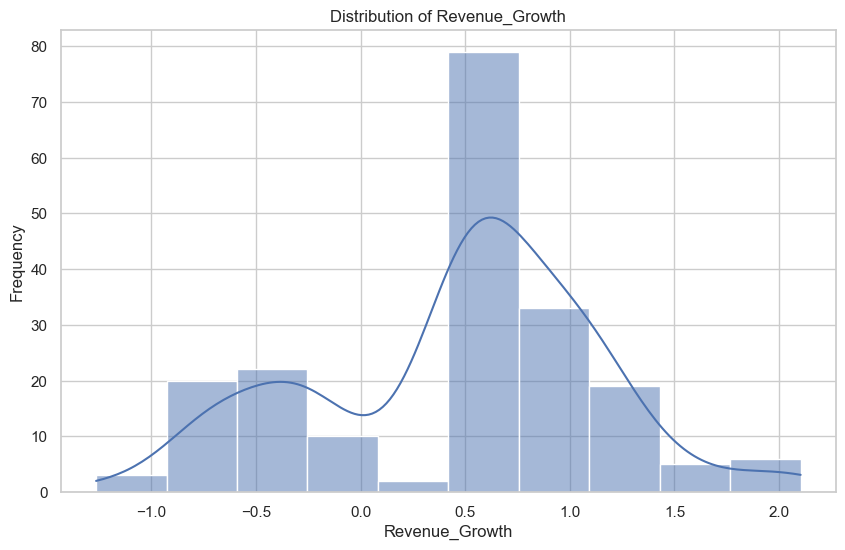

In [5]:
# For numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### General Interpretation of the Histograms & Frequency Polygons For each numeric column:

1. Stock_Price
The distribution of Stock_Price is left-skewed, meaning most stock prices are relatively high, but there are a few significantly lower prices pulling the mean down.

2. Revenue_Millions
The distribution is left-skewed, showing that most companies have high revenues, with a few lower values pulling the average down.

3. Net_Income_Millions
The distribution of Net_Income_Millions is left-skewed, indicating that most companies report higher net incomes, while a few have significantly lower values that drag the mean downward.

4. Market_Cap_Billions
The distribution of Market_Cap_Billions is left-skewed, meaning most companies have high market caps, with a few lower values pulling the mean down.

5. EPS(Earnings Per Share)
The distribution of EPS is approximately normal, indicating most companies have earnings near the average, with fewer extreme values on either side.
This suggests a balanced performance across firms.

6. Profit_Margin
The distribution of Profit_Margin is bimodal, with peaks around 4.5 and 14.5. This suggests two distinct groups of companies — one with low margins and another with high margins. Most companies have margins close to 14.5, while a smaller group clusters around 4.5.

7. Revenue_Growth
Has both negative and positive values, indicating companies experienced both decline and growth.


## 4.Categorical Variables

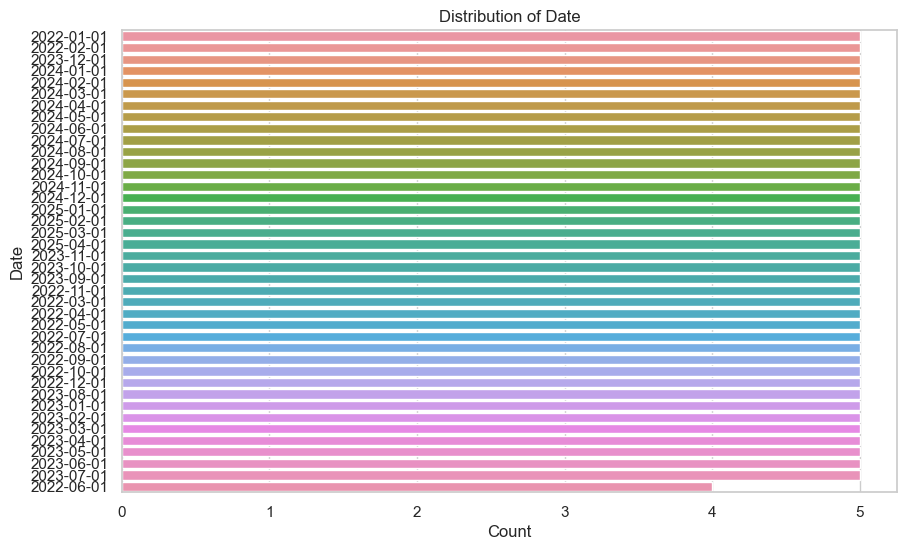

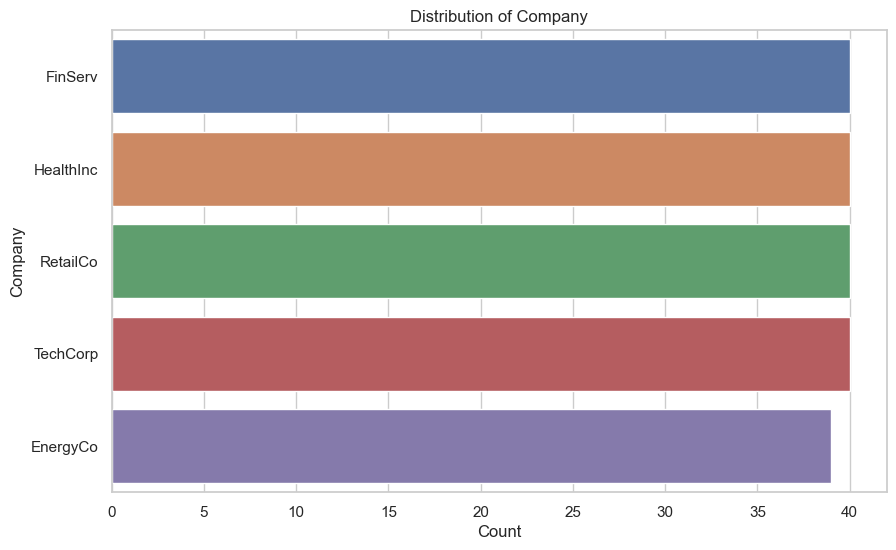

In [6]:
cat_cols = df.select_dtypes(include='object').columns #for categorical columns
for col in cat_cols: #loop through each categorical column
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


- Date distribution interpretation:
Most entries are clustered toward the right side, meaning more recent dates dominate (especially around 2022–2023).

The box is narrow, showing low variability in the date range.

There are no significant outliers, meaning dates are fairly consistent.

This suggests the dataset mainly covers recent company data.

- Company distribution interpretation:
EnergyCo has a notably lower number of entries compared to the other three companies, each of which has around 40 entries. 

This suggests that EnergyCo may have less data available for analysis, potentially limiting insights into its performance. 

In contrast, the other companies have a more balanced representation, allowing for more reliable comparative analysis. 

The discrepancy in entry counts may indicate differences in reporting frequency or operational history among the companies

## 5.Correlation Matrix

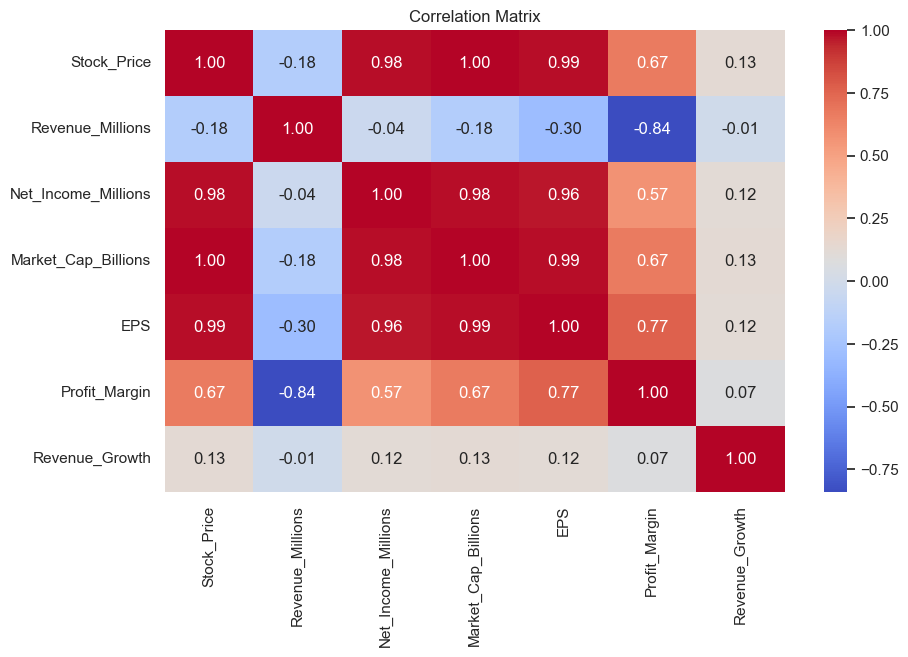

In [7]:
#Only for numeric columns
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") #shows how strong values are related to each other
plt.title('Correlation Matrix')
plt.show()


- Bright red = negative correlation
- Bright blue = positive correlation

### Analysis
1. **Stock\_Price**
   * Strong positive correlation with:
     * Net_Income_Millions(**0.98**)
     * Market_Cap_Billions(**0.99**)
     * EPS (**0.99**)
   * Slight negative correlation with:
     * Revenue_Millions(**-0.18**)
     * Profit_Margin (**-0.67**)

   This shows that higher income, market cap, and earnings per share are linked to higher stock prices.

2. **Revenue\_Millions**
   * Weak negative or no correlation with other variables.
   * Slightly negative with Profit_Margin(**-0.30**), suggesting that higher revenue does not always mean higher profit.

3. **Net\_Income\_Millions**
   * Strong correlation with:
     * Stock_Price (**0.98**)
     * Market_Cap_Billions (**0.98**)
     * EPS(**0.96**)
       Companies with more income tend to have higher stock prices and market value.

4. **Market\_Cap\_Billions**
   * Very strong correlation with:
     * Stock_Price (**0.99**)
     * Net_Income_Millions (**0.98**)
     * EPS (**0.99**)
       Market Cap is driven by these financial metrics.

5. **EPS (Earnings Per Share)**
   * Strong correlation with:
     * Stock_Price, Net_Income_Millions, and Market_Cap_Billions.
       EPS is a key factor in investor value and company performance.

6. **Profit\_Margin**
   * Moderate correlation with EPS (**0.67**) and weak with others.
   * Negative with Revenue_Millions and Stock_Price.
     This suggests high revenue doesn't always mean high efficiency or profit margin.

7. **Revenue\_Growth**
   * Almost no correlation with most variables.
     This shows that short-term growth rate isn't directly tied to stock price or income levels in this dataset.

## 6.Group Comparison and statistical tests

 Boxplot: Net Income by Company


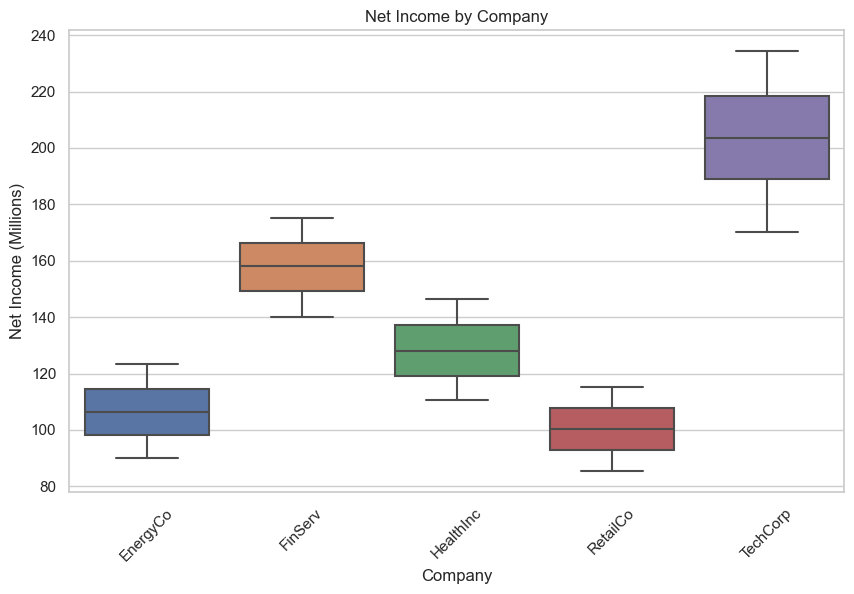

 ANOVA: Net Income by Company
F-statistic = 498.32, P-value = 0.0000

🔬 Pairwise T-tests (Net Income between Companies):
EnergyCo vs FinServ: t-stat = -22.90, p = 0.0000
EnergyCo vs HealthInc: t-stat = -9.57, p = 0.0000
EnergyCo vs RetailCo: t-stat = 2.89, p = 0.0050
EnergyCo vs TechCorp: t-stat = -29.68, p = 0.0000
FinServ vs HealthInc: t-stat = 12.74, p = 0.0000
FinServ vs RetailCo: t-stat = 27.10, p = 0.0000
FinServ vs TechCorp: t-stat = -13.85, p = 0.0000
HealthInc vs RetailCo: t-stat = 12.90, p = 0.0000
HealthInc vs TechCorp: t-stat = -22.63, p = 0.0000
RetailCo vs TechCorp: t-stat = -32.36, p = 0.0000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
import itertools

# Let's compare Net Income across Companies
if 'Company' in df.columns and 'Net_Income_Millions' in df.columns:
    print(" Boxplot: Net Income by Company")
    sns.boxplot(x='Company', y='Net_Income_Millions', data=df)
    plt.title('Net Income by Company')
    plt.xticks(rotation=45)
    plt.ylabel('Net Income (Millions)')
    plt.show()

    # ANOVA across all companies
    company_groups = [group['Net_Income_Millions'].dropna() for _, group in df.groupby('Company')]
    if len(company_groups) >= 2:
        f_stat, p_val = f_oneway(*company_groups)
        print(f" ANOVA: Net Income by Company\nF-statistic = {f_stat:.2f}, P-value = {p_val:.4f}")
    else:
        print(" Not enough companies for ANOVA.")

    # Pairwise T-tests between companies
    companies = df['Company'].dropna().unique()
    print("\n🔬 Pairwise T-tests (Net Income between Companies):")
    for c1, c2 in itertools.combinations(companies, 2):
        g1 = df[df['Company'] == c1]['Net_Income_Millions'].dropna()
        g2 = df[df['Company'] == c2]['Net_Income_Millions'].dropna()
        if len(g1) > 1 and len(g2) > 1:
            t_stat, p_val = ttest_ind(g1, g2, equal_var=False)
            print(f"{c1} vs {c2}: t-stat = {t_stat:.2f}, p = {p_val:.4f}")
        else:
            print(f" Not enough data to compare {c1} and {c2}")
else:
    print(" Missing 'Company' or 'Net_Income_Millions' column.")



- We compared Net Income across different companies using visual (boxplot) and statistical methods.

- Boxplot shows how net income varies by company.

- ANOVA test checks if at least one company’s net income is significantly different.

- T-tests compare net income between every pair of companies.

### Boxplot Analysis:
The horizontal boxplot for Net_Income_Millions across different companies visually demonstrates how net income is distributed per company:

* **TechCorp** appears to have the highest median and largest spread in net income, with likely outliers.
* **EnergyCo** and **HealthInc** show comparatively lower net incomes.
* **RetailCo** shows mid-range values, while **FinServ** also has high income levels but a different distribution shape.
* The boxplot reveals clear differences in the central tendency (medians) and variability (IQRs), suggesting that some companies are consistently more profitable.

### **Statistical Test Results**:

#### ANOVA Summary:

* **F-statistic**: 498.32
* **P-value**: 0.0000 (i.e., p < 0.001)

**Interpretation**:
There is a **statistically significant difference** in the mean net incomes between at least two companies. The low p-value confirms that the differences observed in the boxplots are not due to random chance.


### Pairwise T-Test Highlights:

All pairwise comparisons showed statistically significant differences in mean net income (p < 0.01), including:

* **TechCorp** had significantly higher net income than all other companies for example: TechCorp vs EnergyCo: t = -29.68, p < 0.0001.
* **RetailCo** earned significantly more than **HealthInc** (t = 12.90, p < 0.0001) and **EnergyCo** (t = 2.89, p = 0.0050).
* **FinServ** differed significantly from **all** other companies as well—especially **RetailCo** (t = 27.10, p < 0.0001) and **HealthInc** (t = 12.74,p < 0.0001).

**Implication**:
The consistent significance across pairwise tests suggests each company's financial performance is distinct, with **TechCorp and FinServ** standing out as top performers, while **EnergyCo and HealthInc** fall on the lower end of the spectrum.
